<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования." data-toc-modified-id="Цель-исследования.-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Цель исследования.</a></span></li><li><span><a href="#Задачи-исследования." data-toc-modified-id="Задачи-исследования.-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Задачи исследования.</a></span></li><li><span><a href="#Исходные-данные." data-toc-modified-id="Исходные-данные.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Исходные данные.</a></span></li></ul></li></ul></li><li><span><a href="#Часть-1.-Подготовка-данных-для-анализа" data-toc-modified-id="Часть-1.-Подготовка-данных-для-анализа-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Часть 1. Подготовка данных для анализа</a></span></li><li><span><a href="#Часть-2.-Анализ-данных" data-toc-modified-id="Часть-2.-Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Часть 2. Анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Часть-3.--Подготовка-презентации" data-toc-modified-id="Часть-3.--Подготовка-презентации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Часть 3.  Подготовка презентации</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общий вывод <a id="4-bullet" rel="nofollow"></a></a></span></li></ul></li></ul></div>

## Описание проекта

#### Описание исследования
Исследование открытые данные о заведениях общественного питания в Москве для оценки долгосрочных перспектив реализации бизнес проекта кафе в Москве с роботами-официантами.
    
_____
#### Цель исследования.
Приоритизировать данные, сделать вывод и сформулировать рекомендации 
    
_____
#### Задачи исследования.

1. Исследование видов объектов общественного питания, сетевых и несетевых заведений. Визуализация данных.
2. Анализ принципов сетевого и несетевого распространения заведений сектора общественного питания. Анализ среднего числа посадочных мест. Визуализация данных.  
Анализ расположения: 
* выделение улиц;
* топ-10 улиц по количеству объектов общественного питания;
* число улиц с единичными компаниями общепита;
* распределение количества посадочных мест для улиц.  
Общий вывод и рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Анализ возможности развития сети.
3. Подготовка презентации.

_____
#### Исходные данные.
    
Данные о заведениях общественного питания Москвы. 
______

##  Часть 1. Подготовка данных для анализа

In [57]:
!pip install googlemaps
!pip install geocoder
!pip install plotly
!pip install folium

In [58]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

from matplotlib import pyplot as plt

import seaborn as sns
import plotly.express as px
import json
import requests

import math
from scipy import stats
import re

from pymystem3 import Mystem
from collections import Counter

from datetime import timedelta
import datetime as dt

from statsmodels.stats.proportion import proportions_ztest
import warnings

from io import BytesIO
import requests

warnings.filterwarnings('ignore')

In [59]:
try:
    data = pd.read_csv('rest_data.csv', sep=',')
except:
    data = pd.read_csv('/datasets/rest_data.csv', sep=',')
    
#переведем названия столбцов в нижний регистр для удобства
#data.columns = [x.lower() for x in data.columns.values]

data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


В исходном датасете:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

In [60]:
#общая функция для предобработки с прошлых занятий
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df

#понизим регистр
data['object_name'] = data['object_name'].str.title()

#замним "да" и "нет"
d = {'да': 'Сетевое', 'нет': 'Несетевое'}
data['chain'] = data['chain'].map(d)

data = inspect(data)

,id,object_name,chain,object_type,address,number
0,151635,Сметана,Несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,Несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,Несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,Пиццетория,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая Метель»,Несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
Количество дубликатов - 0


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Столовая                     321
Кафе                         278
Шаурма                       250
Шоколадница                  158
Kfc                          155
                            ... 
Lets Rok Bar                   1
Benner'S                       1
Фудмаркет. Коноплина Е.А,      1
Кафе «Квартира 44»             1
Кофе Тун Суши Тун              1
Name: object_name, Length: 9924, dtype: int64

**************************************************


Несетевое    12398
Сетевое       2968
Name: chain, dtype: int64

**************************************************


кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

**************************************************


город Москва, Ходынский бульвар, дом 4             95
город Москва, Пресненская набережная, дом 2        63
город Москва, проспект Мира, дом 211, корпус 2     60
город Москва, Кировоградская улица, дом 13А        53
город Москва, площадь Киевского Вокзала, дом 2     48
                                                   ..
город Москва, Ленинградский проспект, дом 65        1
город Москва, Боровское шоссе, дом 6Б               1
город Москва, Каширское шоссе, дом 13, корпус 3     1
город Москва, Боровское шоссе, дом 50               1
город Москва, улица Проходчиков, дом 9              1
Name: address, Length: 9108, dtype: int64

**************************************************


In [61]:
# Проверим данные на наличие дубликатов без учета id;
#одно и то же заведение может быть записано под разными id, но разное число посадочных мест может говорить как о разных залах, так и о разных объектах налогообложения

duplicated = data[data[['object_name', 'address','object_type', 'number']].duplicated()]
print('Количество дубликатов без учета id: ' + str(duplicated['id'].count()))

display(duplicated.head(20).sort_values(by='address'))

Количество дубликатов без учета id: 85


,id,object_name,chain,object_type,address,number
5186,107574,Кафе,Несетевое,кафе,"город Москва, 1-я Останкинская улица, дом 55",10
5190,107480,Кафе,Несетевое,кафе,"город Москва, 1-я Останкинская улица, дом 55",5
5188,107466,Кафе,Несетевое,кафе,"город Москва, 1-я Останкинская улица, дом 55",5
5185,107442,Кафе,Несетевое,кафе,"город Москва, 1-я Останкинская улица, дом 55",20
2381,28611,Комбинат Питания Мгту Им.Н.Э.Баумана,Несетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
5059,20021,Lift,Несетевое,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
5069,20025,Lift,Несетевое,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
4431,23759,Столовая Гбоу Города Москвы № 384,Несетевое,буфет,"город Москва, Беловежская улица, дом 67",100
5690,102011,Кафе,Несетевое,предприятие быстрого обслуживания,"город Москва, Большая Семёновская улица, дом 16",5
3481,20914,Буфет Мади,Несетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40


Проверка дубликатов показала, что есть позиции, с возможными дубликатами. Однако нельзя исключить вариант, в котором дубликаты таковыми не являются: часто заведения общественного питания условно разбивают зал на несколько подзвалов, снижая таким образом выручку - каждое предприятие попадает под категорию "малого предприятия", что дает возможность использовать льготное налогообложение. Поэтому было принято решение не удалять предприятия где нет полных дубликатов.

##  Часть 2. Анализ данных

Исследуем соотношение видов объектов общественного питания по количеству:

In [62]:
fig_1 = px.bar(
    data.groupby('object_type').count().reset_index().sort_values(by='id', ascending=False),
     x='object_type',
     y='id',
     text='id',
     title='Количество объектов по типу заведения',
     labels={'id':'Количество','object_type':'Тип'}
               )
fig_1.update_xaxes(tickangle=45)
fig_1.show()

Из полученных данных можно сделать вывод,:  
* наибольшее число объектов общепита в секторе "кафе" - 6099 заведений
* с большим отрывом идут группы "столовая" (2587 шт) и"ресторан" (2285 шт)

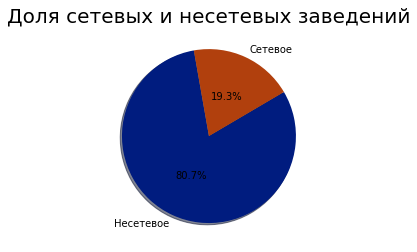

In [63]:
fig = px.bar(
    data.groupby('chain').count().reset_index().sort_values(by='id', ascending=False),
     x='chain',
     y='id',
     text='id',
     title='Количество сетевых и несетевых заведений',
     labels={'id':'Количество','chain':'Тип'}
               )
fig.update_xaxes(tickangle=45)
fig.show()

chain = data.groupby('chain').count().reset_index().sort_values(by='id', ascending=False)
labels = chain['chain']
fig1, ax1 = plt.subplots()
ax1.pie(chain['id'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, pctdistance=0.5)
plt.title("Доля сетевых и несетевых заведений", fontsize=20);

Несетевых заведений заметно больше (80,7% от общего числа или 12398 шт), чем сетевых (19,3% или 2968 шт).  
Для какого вида объекта общественного питания характерно сетевое распространение?

In [64]:
#группируем по типу заведений
grouped_chain = data.pivot_table(values = 'object_name', index='object_type', columns=['chain'], aggfunc='count').reset_index()
#рассчитываем соотношение сетевых заведений к общему числу
grouped_chain['ratio'] = grouped_chain['Сетевое']/(grouped_chain['Сетевое']+grouped_chain['Несетевое']) * 100

#строим диаграмму долей сетевых заведений
fig_3 = px.bar(grouped_chain.sort_values(by='ratio', ascending=False),
                y='ratio',
                x='object_type',
                title='Доля сетевых заведений по типам, %',
                labels={'ratio':'Доля сетевых заведений', 'object_type':'Тип'})

fig_3.show()

In [65]:
# Код ревьюера

data.groupby('object_type').apply(lambda x : pd.Series(dict(ratio=(x['chain'] == 'Сетевое').mean())))

,ratio
object_type,
бар,0.043224
буфет,0.018803
закусочная,0.155556
кафе,0.228890
кафетерий,0.130653
магазин (отдел кулинарии),0.285714
предприятие быстрого обслуживания,0.411336
ресторан,0.238074
столовая,0.001160


Наиболее высокая (более 41,13%) доля сетевых заведений в категории предприятий быстрого обслуживания.  
Узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
Для каждого вида объекта общественного питания определим среднее количество посадочных мест.

In [66]:
#сделаем срез по сетевым заведениям:
fig4 = data.loc[data['chain'] == 'Сетевое']

fig4 = fig4.pivot_table(index='object_name', values='number',\
                        aggfunc= ['count', 'mean']).reset_index() 

fig4.sort_values(by=('count','number'), ascending=False)

,object_name,count,mean
,,number,number
564,Шоколадница,157,57.184713
25,Kfc,155,55.341935
331,Макдоналдс,151,87.119205
110,Бургер Кинг,137,46.649635
522,Теремок,94,25.606383
...,...,...,...
144,Гурмания,1,98.000000
343,Мираторг,1,12.000000
342,Мимино Хинкальная,1,70.000000


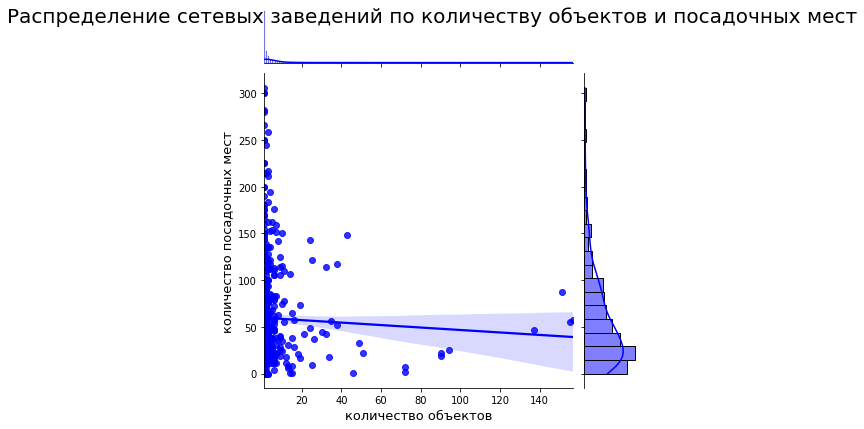

In [67]:
fig4 = sns.jointplot(x=('count','number'), y=('mean','number'), data=fig4, kind='reg', color='blue') 
sns.set_palette('dark') 
fig4.fig.suptitle('Распределение сетевых заведений по количеству объектов и посадочных мест', fontsize=20)
fig4.set_axis_labels('количество объектов', 'количество посадочных мест', fontsize=13);

Распределение заведений по числу посадочных мест говорит о том, что больше всего сетей с небольшим числом заведений (до 20) и небольшим количеством посадочных мест (до 80). Если в сети много заведений, то, как правило, вместимость у них небольшая. 

In [68]:
object_number = data.pivot_table(index='object_type', values='number',\
                        aggfunc= ['mean']).reset_index().sort_values(by=('mean','number'), ascending=False)
object_number

,object_type,mean
,,number
8,столовая,130.246618
7,ресторан,96.834136
1,буфет,51.129915
0,бар,43.494159
3,кафе,39.716019
6,предприятие быстрого обслуживания,20.552262
4,кафетерий,9.123116
2,закусочная,7.608333
5,магазин (отдел кулинарии),5.589744


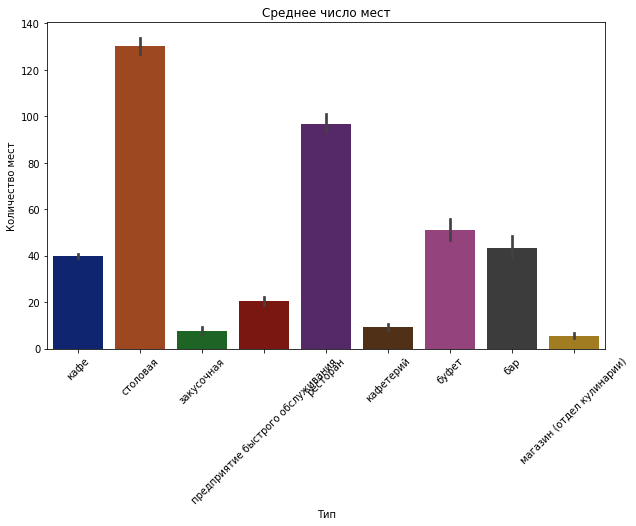

In [69]:
plt.figure(figsize=(10,6))
fig5 = sns.barplot(x='object_type', y='number', data=data, estimator=np.mean)
fig5.set_xlabel('Тип')
fig5.set_ylabel('Количество мест')
fig5.set_title('Среднее число мест')
plt.xticks(rotation=45)
plt.show()

Большее число посадочных мест в столовых и предприятиях быстрого обслуживания, меньше всего в закусочных, кафетериях и магазинах кулинарии.   
Рассмотрим расположение заведений. Выделим в отдельный столбец информацию об улице из столбца address .

In [70]:
#рассмотрим уникальные значения
m = Mystem() 
addresses = ' '.join(data['address'].unique())
lemmas = m.lemmatize(addresses)
#lemmas

In [71]:
words = ['улица','переулок','шоссе','проспект','площадь','проезд','бульвар','набережная']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat, flags=re.I)
data

,id,object_name,chain,object_type,address,number,street
0,151635,Сметана,Несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,Несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,Несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,Пиццетория,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая Метель»,Несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,Сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,Сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [86]:
# Код ревьюера

try:
    print(re.search(str_pat, "город Москва, проспект Мира").group(1))
except AttributeError as e:
    print("Не нашлось :( Хотя вот же оно.", e)

try:
    print(re.search(str_pat, "город Москва, проспект Мира,").group(1))
except AttributeError as e:
    print("Это не выполнится")


Не нашлось :( Хотя вот же оно. 'NoneType' object has no attribute 'group'
проспект Мира


Построим график топ-10 улиц по количеству объектов общественного питания. Я рассмотрю два вида материалов: вхождение в районы, без точной геолокации и с использованием точной геолокации для ответа на вопрос — в каких районах Москвы находятся эти улицы и почему. Расположение точек общепита коррелируется с пассажирскими трафиками: все чаще люди предпочитают есть "на бегу", по дороге на работу, в школу, в поездке. Поэтому предположу, что сосредоточение общепитов будет в наиболее оживленных местах: у дорог, в местах наибольшего скопления людей, например, у музеев, парков, театров.

In [72]:
#группируем по имени населенного пункта, сортируем и берем первые 10
str_10 = data.groupby('street').count().sort_values(by='id', ascending=False).head(10)
#срез топ-10
top10 = str_10.index[:10].to_list()
top10

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

In [73]:
fig_6 = px.bar(str_10.reset_index(),
                y='id',
                x='street',
                text='id',
                title='Топ-10 улиц по числу объектов общественного питания',
                labels={'id':'Количество объектов', 'street':'Улица'})
fig_6.show()

Рассмотрим расположение топ-5:
* Проспект Мира расположен в районах Алексеевский, Марьина роща, Мещанский, Останкинский, Ростокино, Свиблово и Ярославский на территории Северо-Восточного административного округа и Центрального административного округа города Москвы.
* Профсоюзная улица в Юго-Западном административном округе города Москвы на территории районов Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево.
* Ленинградский проспект расположен в районах Аэропорт, Беговой, Сокол и Хорошёвский на территории Северного административного округа
* Пресненская набережная в Пресненском районе.
* Варшавское шоссе — магистральная улица в Москве, проходящая от Большой Тульской улицы до южной границы города через районы: Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное ЮАО и Северное Бутово, Южное Бутово ЮЗАО, далее по ТиНАО.
Варшавское шоссе даже крупная магистральная улица, как и Ленинский проспект, кутузовский проспект. Проспект Вернадского входит в состав 13-и районов Западного административного округа, Каширское шоссе - ответвляющееся от Варшавского шоссе на границе московских районов «Нагатино-Садовники» и «Нагорный». Кировоградская улица - улица в Южном административном округе города Москвы на территории районов Чертаново Северное, Чертаново Центральное и Чертаново Южное.

Можно сделать вывод, что для общественного питания выбираются наиболее оживленные транспортные узлы, охватывающие большие пассажиро- и автопотоки.  
Среди отдельных районов лидером станет Пресненская набережная (167 объектов) - улица не охватывает другие районы, а концентрация заведений на ней такая же высокая, как на остальных топ-5. Это элитный район, где расположены Государственный музей искусства народов Востока и тихие Патриаршие пруды. На территории района находятся Московский зоопарк и Московский планетарий с интерактивным музеем.  Соответственно, здесь большое число отдыхающих туристов и посетителей достопримечательностей.  
Данные о геолокации перенесены на гугл диск.

In [74]:
#Делаем фрейм с адресами всех объектов на этих топ 10 улиц
district_10 = data.query('street in @top10')
district_10

,id,object_name,chain,object_type,address,number,street
151,155973,Кафе «Андерсон»,Сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,Кафе «Subway»,Сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,Кафе «Ламаджо»,Несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,Шаурма В Пите,Несетевое,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,Несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,Додо Пицца,Сетевое,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,Милти,Сетевое,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,Кальянная «Мята Lounge»,Сетевое,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,Мята,Сетевое,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


In [76]:
url = 'https://docs.google.com/spreadsheets/d/1aluUGsXaL2oHFfbnChFkuIWrjjmJFmqKWT9YWF3tTYA/edit?usp=sharing'
url.split('/')
id = url.split('/')[5]
geo_loc = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')
fig_7 = px.bar(geo_loc.groupby('district').count().reset_index().sort_values(by='id', ascending=False),
                y='id',
                x='district',
                text='id',
                title='Количество объектов по районам',
                labels={'district':'Район', 'id':'Количество'}
               )
fig_7.update_xaxes(tickangle=45)
fig_7.show()

Проанализируем точные данные геолокации. Можно подтвердить полученные ранее выводы: Пресненский район наиболее привлекателен. Спальные районы Чертаного Центральное и Тропарево-Никулино также в тройке лидеров.
Найдем число улиц с одним объектом общественного питания. Определим, в каких районах Москвы находятся эти улицы:

In [77]:
rest_1 = data.groupby('street').count().sort_values(by='id', ascending=True)
rest_1_streets = rest_1[rest_1['id'] == 1].index.to_list()
len(rest_1_streets)

535

In [78]:
#данные всех объектов на улицах наиболее популярных улицах
rest_1_data = data.query('street in @rest_1_streets')
rest_1_data

,id,object_name,chain,object_type,address,number,street
19,153644,Американская Лаборатория Десертов,Несетевое,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок
61,21214,Столовая,Несетевое,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица
69,22139,Хуанхэ,Несетевое,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок
81,25833,Азербайджан,Несетевое,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного
131,150881,Вгик,Несетевое,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица
...,...,...,...,...,...,...,...
14440,211368,Пацио Пицца,Несетевое,кафе,"город Москва, улица Линии Октябрьской Железной...",20,улица Линии Октябрьской Железной Дороги
14704,214324,Кадаши ( Закрытый),Несетевое,ресторан,"город Москва, 2-й Кадашёвский переулок, дом 16...",15,2-й Кадашёвский переулок
14798,223171,Кондитерская «Пряник.Рогалик»,Несетевое,кафе,"город Москва, город Троицк, Пионерская улица, ...",20,Пионерская улица
14974,213930,Горячий Хлеб,Несетевое,предприятие быстрого обслуживания,"город Москва, поселение Десеновское, улица Дми...",0,улица Дмитрия Рябинкина


In [80]:
url = 'https://docs.google.com/spreadsheets/d/1GmhxX6ES-86VH7E0ak6hSel43qxx9X2DrvMq7N9IE20/edit?usp=sharing'
url.split('/')
id = url.split('/')[5]
rest_1_data = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')
rest_1_data.round()

,id,object_name,chain,object_type,address,number,street,district,location_lat,location_lng
0,153644,американская лаборатория десертов,Несетевое,кафе,"город москва, филипповский переулок, дом 15/5",20,филипповский переулок,Arbat,56.0,38.0
1,21214,столовая,Несетевое,столовая,"город москва, бабаевская улица, дом 3",90,бабаевская улица,Sokol'niki,56.0,38.0
2,22139,хуанхэ,Несетевое,ресторан,"город москва, 1-й балтийский переулок, дом 3/25",60,1-й балтийский переулок,Aeroport,56.0,38.0
3,25833,азербайджан,Несетевое,ресторан,"город москва, улица демьяна бедного, дом 4",180,улица демьяна бедного,Khoroshevo-Mnevniki,56.0,37.0
4,150881,вгик,Несетевое,столовая,"город москва, будайская улица, дом 3",45,будайская улица,Rostokino,56.0,38.0
...,...,...,...,...,...,...,...,...,...,...
550,211368,пацио пицца,Несетевое,кафе,"город москва, улица линии октябрьской железной...",20,улица линии октябрьской железной дороги,Timiryazevskiy,56.0,38.0
551,214324,кадаши ( закрытый),Несетевое,ресторан,"город москва, 2-й кадашёвский переулок, дом 16...",15,2-й кадашёвский переулок,Yakimanka,56.0,38.0
552,223171,кондитерская «пряник.рогалик»,Несетевое,кафе,"город москва, город троицк, пионерская улица, ...",20,пионерская улица,Troitsk,55.0,37.0
553,213930,горячий хлеб,Несетевое,предприятие быстрого обслуживания,"город москва, поселение десеновское, улица дми...",0,улица дмитрия рябинкина,"Desenovskoye, Poseleniye",56.0,37.0


In [81]:
fig_8 = px.bar(rest_1_data.groupby('district').count().reset_index().sort_values(by='id', ascending=False),
                y='id',
                x='district',
                text='id',
                title='Количество улиц с единственным объектом общественного питания по районам',
                labels={'district':'Район', 'id':'Количество'}
               )
fig_8.update_xaxes(tickangle=45)
fig_8.show()

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:


In [82]:
#функция для числа корзин
def set_bins(df, value):    
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return  100
    elif df[value].max() > 1000:
        return  200
    else: return 20

In [83]:
def create_hist(df, col):
    coef_bins = 0.005
    a = df.loc[(df[col] >= df[col].quantile(.05))&(df[col] <= df[col].quantile(.95)), col]
    plt.figure(figsize =(6, 2))
    plt.boxplot(a,  
            sym="o", 
            vert=False,
            widths = 0.2, 
            patch_artist = True)
    plt.ylabel('Ящик с усами (по столбцу) ' + col)
    plt.tick_params(axis = 'both',   
               which = 'major',    
               direction = 'inout',    
               length = 20,    
               width = 4,     
               color = 'b',    
               pad = 10,    
               labelsize = 15,    
               labelcolor = 'b'    
             )    
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    hist = a.plot(
                kind='hist', 
                bins=set_bins(df, col), 
                alpha=0.5, 
                ec='black',
                color='blue',
                )
    plt.axvline(x=a.median(),
                linewidth=3, 
                color='black', 
                linestyle='--')
    plt.axvline(x=a.quantile(.05),
                linewidth=3, 
                color='b', 
                linestyle='--')
    plt.axvline(x=a.quantile(.95),
                linewidth=3, 
                color='b', 
                linestyle='--')
    plt.title('Распределение (по столбцу) ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

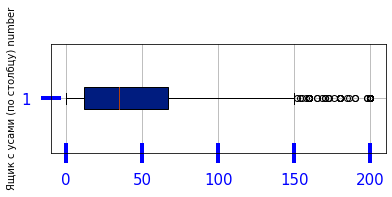

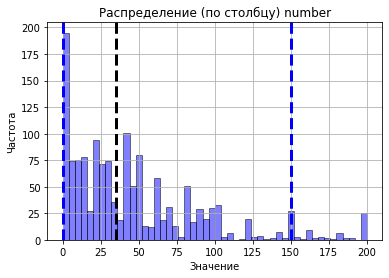

In [84]:
create_hist(geo_loc, 'number')

Среднее количество посадочных мест для улиц с большим количеством объектов общественного питания - 49, медианное значение - 30. Есть выбросы в районе 0, скорее всего, присутствуют точки без посадочных мест и работающие на вынос. Преобладают заведения с небольшим количеством мест (10-50), объектов на большее число мест (60-120) в выгрузке меньше.

In [85]:
fig9 = px.histogram(
    geo_loc.loc[(geo_loc['number'] >= geo_loc['number'].quantile(.05))&(geo_loc['number'] <= geo_loc['number'].quantile(.95))], 
    x="number", 
    marginal="box",
    color='street',
    nbins=50,
    title='Распределение количества посадочных мест по улицам с большим количеством объектов общественного питания'
)
fig9.show()

#### Вывод
Больше заведений с малым числом сетевых объектов (до 10) и небольшим количеством посадочных мест (20-50). Заведения с большим количеством объектов обладают небольшой вместимостью (40-70 мест)
В Таганском районе больше всего улиц с одним объектом общественного питания (28). В Тверском, Сокольниках и Лефортово тоже немало улиц, где всего одно заведение: 26, 22, 21. Например, Таганский район расположен в Центральном округе с большим пассажиропотоком и инфраструктурой с деловыми центрами и объект питания на одной из таких улиц был бы там очень прибылен.
На проспекте Мира самое большое медианное значение числа посадочных мест - 44. На Кутузовском, Ленинградском и Ленинском проспектах их 35-40. На Профсоюзной улице распространены объекты с меньшим числом посадочных мест  медиана числа посадочных мест равна 24. На Варшавском, Кировоградской и Пресненской набережной медиана числа посадочных мест равна 24-26.

##  Часть 3.  Подготовка презентации

Презентация: https://drive.google.com/file/d/1_KY4iri29r3NqIY1oTVkC0mXUmHfWezO/view?usp=sharing



Больше всего в выгрузке записей о кафе, столовых, ресторанах и предприятиях быстрого обслуживания. Лидируют по тику объектов кафе.  
Сетевой формат более характерен для предприятий быстрого обслуживания, магазинов с отделом кулинарии и ресторанов. Следует обратит внимание на несетевые виды бизнеса.  
В выборке преобладают заведения с небольшим числом объектов (до 10) и небольшим количеством посадочных мест (20-50). Наиболее популярными являются форматы с 30-40 посадочными местами.
Больше всего посадочных мест у столовых и ресторанов, буфеты и бары примерно на одном уровне (32- 35), у кафе их чуть меньше (30).  
Больше всего объектов общественного питания находится на улице Мира, затем на втором месте Профсоюзная улица и на третьем Ленинградский проспект. При этом больше всего заведений оказалось в Пресненском районе, где много туристов. Также популярно открывать общепиты по наиболее оживленным пассажиропотокам и спальным районам (Чертаново и Тропарево-Никулино).  
Улицы с одним объектом общественного питания распределены по всей Москве, в центре их больше, к окраинам их меньше.
В Таганском районе больше всего улиц с единичными объектами общественного питания.

### Общий вывод <a id='4-bullet'></a>

В результате проведенного анализа сделаны следующие выводы:
* Большинство объектов – кафе.
* Наиболее высокая (более 41,13%) доля сетевых заведений в категории предприятий быстрого обслуживания.
* Среднее количество посадочных мест для улиц с большим количеством объектов общественного питания - 49, медианное значение - 30. Есть выбросы в районе 0, скорее всего, присутствуют точки без посадочных мест и работающие на вынос. 
* Для общественного питания выбираются наиболее оживленные транспортные узлы, охватывающие большие пассажиро- и автопотоки, а также элитные районы с достопримечательностями (Пресненский район). Анализ отдельных локаций показал концентрацию в крупных спальных районах (Чертаново, Тропарево-Никулино).
* Больше заведений с малым числом сетевых объектов (до 10) и небольшим количеством посадочных мест (20-50). 
* Заведения с большим количеством объектов обладают небольшой вместимостью (40-70 мест) 

На основе выводов и результатов анализа, были даны следующие рекомендации о заведении:
1. Стоит выбрать тип кафе, с собственным, уникальным дизайном, несетевое.
2. Количество посадочных мест следует выбрать среднее, около 30-40. 
3. Можно выбрать Пресненский (наиболее популярный) или Таганский (с наименьшим числом заведений) районы. В одном конкуренция будет очень высокой (Пресенский район), но целевой сегмент потребителей уже хорошо знает, что там много кафе и в нем постоянный поток потребителей. В этом случае можно вытеснить более типовых конкурентов и забрать их целевой сегмент. В Таганском районе высокий пассажиропоток, там еще нет сформировававшегося постоянного предложения и возможно его перспективность.
4. Возможность развития сети. 
Москва отлично подходит для нового заведения с оригинальной концепцией, в том числе из-за высокого туристического потока и повседневной деловой активности. Посзже возможен франчайзинг в крупные города (Санкт-Петербург, Екатеринбург, Казань и пр).
5. Дополнительной возможностью является робо-доставка еды на дом.
